This is simple project where we find if a perticuler `internet user` click on perticuler `ad` or not. 

We will work with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

The model is giver in the `dataset` folder.

So, lets start.

We will start with importing the essential libraries.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# remove warnings
warnings.filterwarnings('ignore')

Now let's load the data and see what we have in our hand.

In [2]:
ad_data = pd.read_csv('datasets/advertising.csv')
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


So, we have `9` columns and

we can see that the `dataset` has `1000` rows and there is no missing data. So, we can proceed further and our work is made easy.

now, lets check the `head` of the data.

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


So, we have some columns like `Daily Time Spent on Site`, `Age`, `Area Income`, `Daily Internet Usage`, `Male` and `Clicked on Ad`. Here the `Clicked on Ad` is our `target` variable and rest are `features`.

AS, we have to figure out which are categorical and which are numerical, we can drop the `Ad Topic Line` and `City` columns as they are not useful for us and not relevent to our target variable.

So, let's do some exploratory data analysis.

Let's see the distribution of age.

<Axes: xlabel='Age', ylabel='Count'>

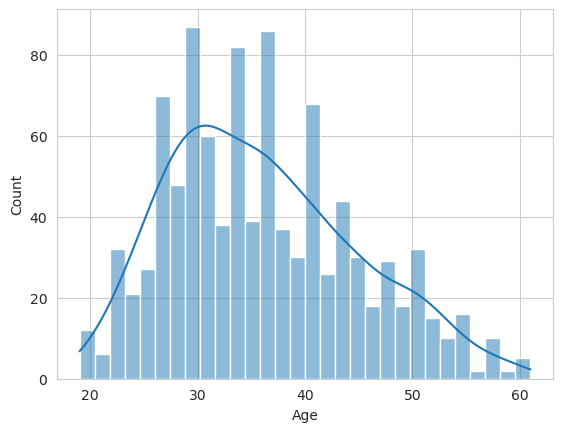

In [4]:
# histogram of the age
sns.set_style('whitegrid')
sns.histplot(ad_data['Age'], bins=30, kde=True)

I think it's a `normal distribution` and we can see that the `age` is `20` to `60` and most of the people are in the `30` to `40` age group.

Now, I wanna see the correlation between the `age` and `time spent on site`.   

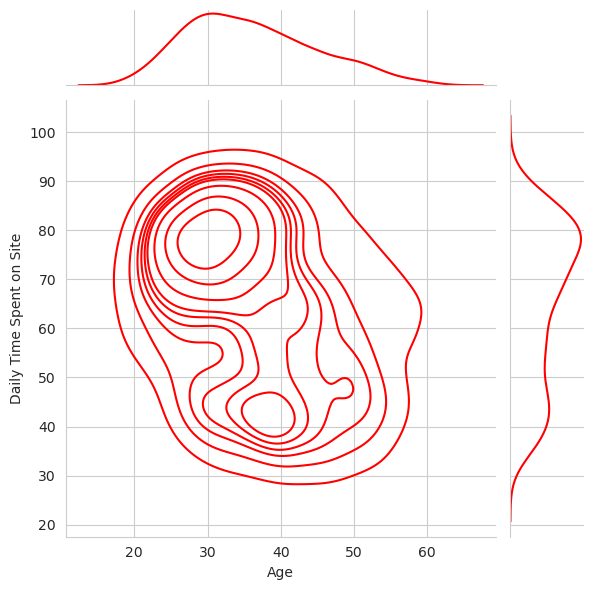

In [5]:
# age vs time spent on site
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

Well that is not helping much. But it helps use to see that the `25-35` age group people are spending more time on the site.

We can also try to see the correlation between `daily internet usage` and `daily time spent on site`. this will help us to see if the people are spending more time on the site, are they using more internet or not.

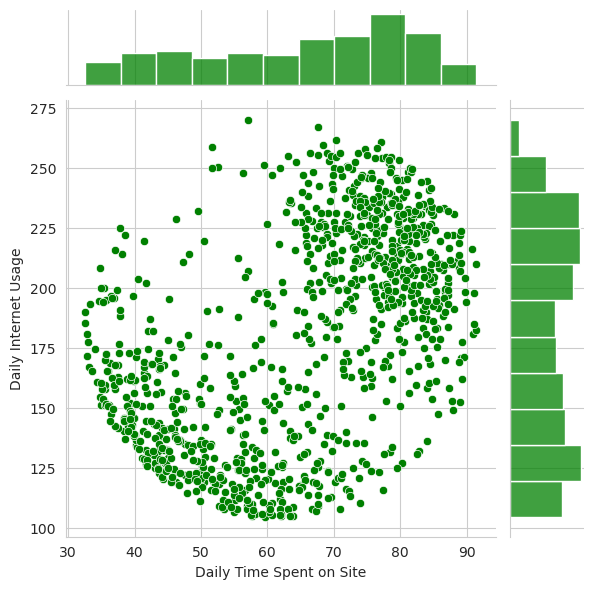

In [6]:
# daily time spent on site vs daily internet usage
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

We can really see the two `clusters` here. One is the `people who are spending more time on the site` and the other is the `people who are spending less time on the site`.

Now, let's see the `pairplot` of the data.

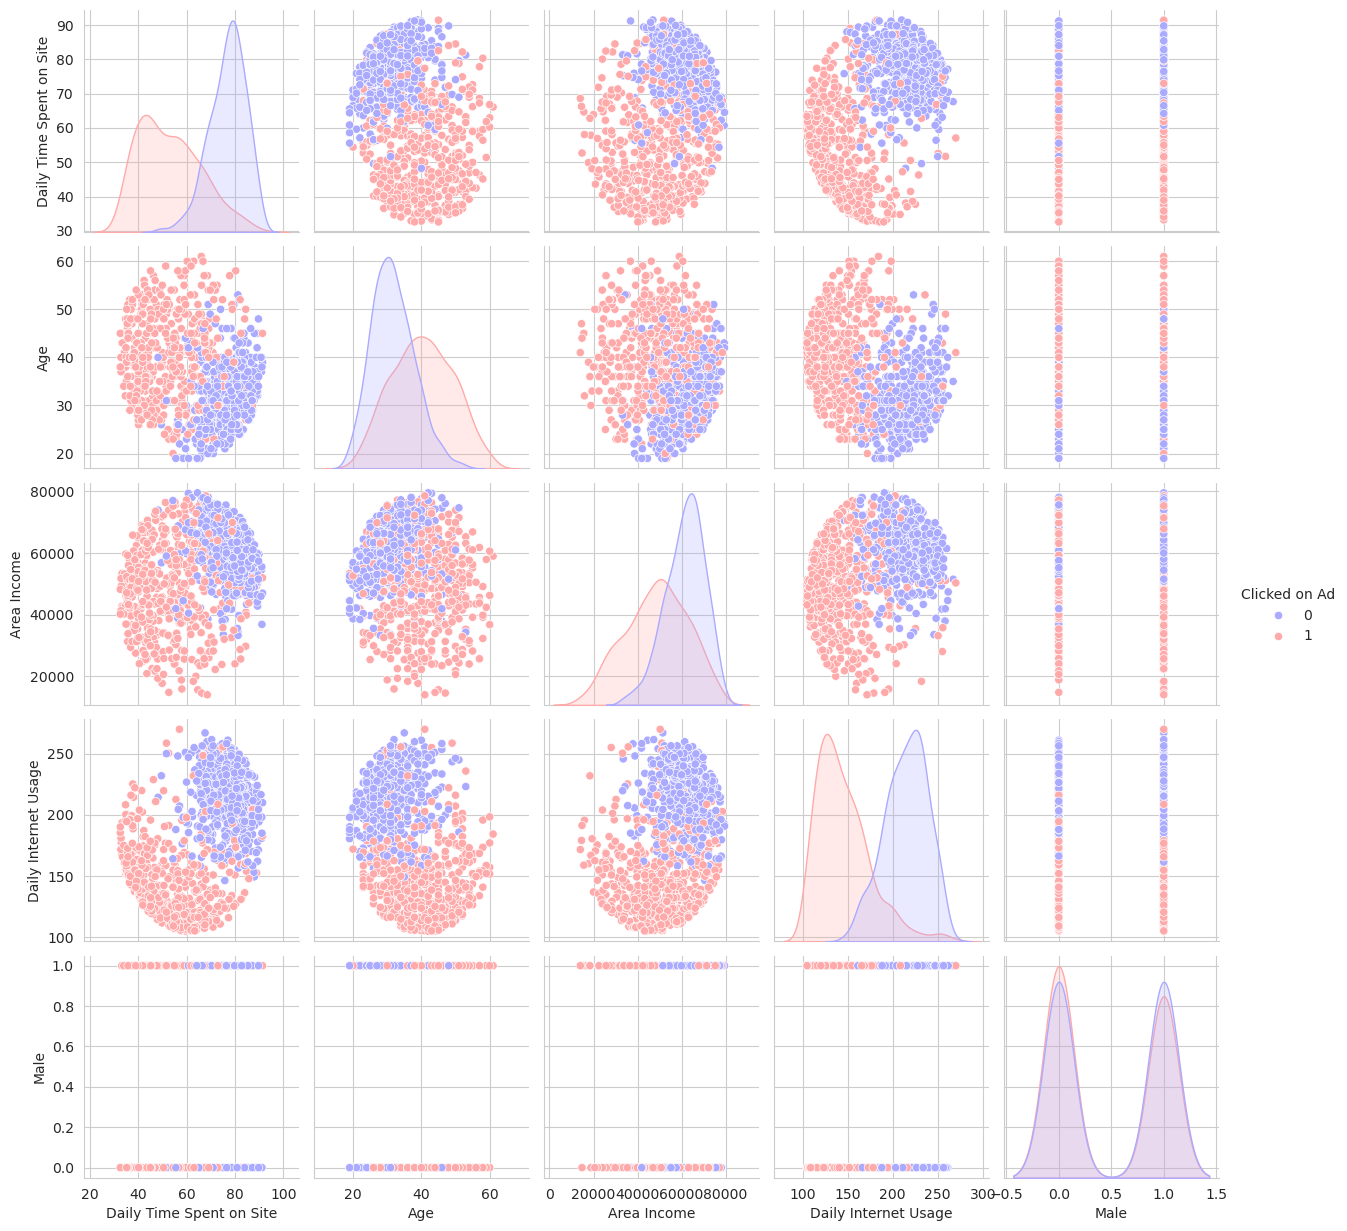

In [7]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr')

ANNNNDDD here you go. With this we can see the `correlation` between the `features` and the `target` variables. SO, figure out the `correlation` and we can see that the `age` and `daily internet usage` are the most important features.

Now I will move on to making the model. We can just frop the unuseful columns and make the model.

In [8]:
# train test split
from sklearn.model_selection import train_test_split

# drop the non-numeric columns and the target column like 'Ad Topic Line', 'City', 'Country', 'Timestamp' and 'Clicked on Ad'
x = ad_data.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

# target column
y = ad_data['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [9]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

So, we have a clean data and we can move on to making the model.

In [11]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

We have the `instantiated` the `LogisticRegression` model and we can `fit` the model.

In [12]:
logmodel.fit(x_train, y_train)

LogisticRegression()

Success. We have the model and we can `predict` the values.

Well it's that easy because evrything is written in the `sklearn` library. we just have to import the libraries and use them.

Let's predict something.

In [13]:
logmodel.predict(x_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

we can do a better visualication of the prediction by plotting the y_test and the prediction.

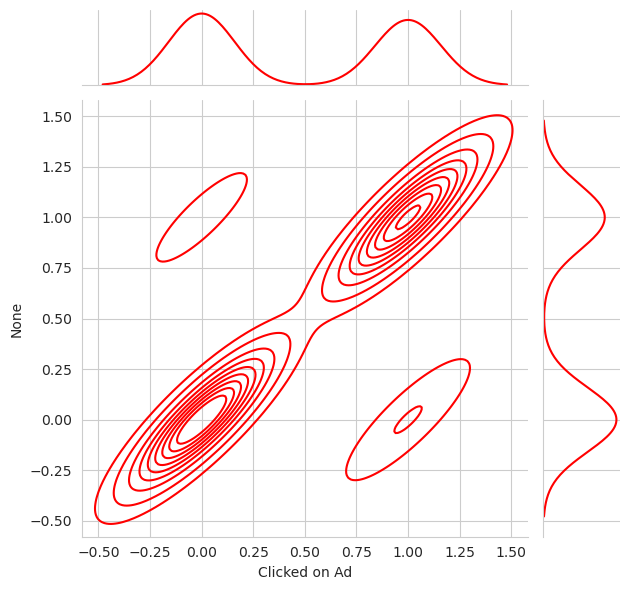

In [14]:
# y_test vs predicted values
predictions = logmodel.predict(x_test)
sns.jointplot(x=y_test, y=predictions, kind='kde', color='red')

The `plot` is showing that the `model` is working very well. We can see that the `model` is predicting the `0` and `1` very well and there's only a few `0` and `1` which are not predicted correctly.

So, let's evalaute the model.

In [15]:
# classification report
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, predictions))
#also can use confusion matrix
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]


So, our model is getting a `93%` average accuracy. That's great.

And that's it. We have made a model which can predict if a perticuler `internet user` click on perticuler `ad` or not.